# Global Burden of Disease
## Data related to the burden of diseases, injuries, and risk factors globally between 1970 and 2010
###### Source: Instituto de Métricas e Avaliação de Saúde (IHME)

Questions to be answered proposed by Universidade dos Dados:
1. Which country has the highest average mortality rate per 100,000 individuals over all the years?
2. What is the trend in the mortality rate per 100,000 individuals over the years for South American countries? Plot a line graph showing all countries and the evolution of deaths over the years.
3. Are there significant differences in mortality rates between men and women in different age groups for South American countries?
4. How does the mortality rate per 100,000 individuals vary among different age groups within Brazil? Use a histogram showing the distribution of deaths per year for each age group.
5. What is the trend in deaths by gender for Brazil? Plot a line graph with each line representing one of the genders over the years.
6. Which age group has the highest number of deaths in Brazil? Is this number the same when looking at all years compared to considering only the last 10 years?
7. Which country showed the most significant improvement in mortality rates per 100,000 individuals over the analyzed period?

## PART 1 - Importing and general analysis

### >> Importing data

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\Users\bserpellone\Desktop\Universidade de dados\Desafios\IHME_GBD_2010_MORTALITY_AGE_SPECIFIC_BY_COUNTRY_1970_2010.csv',
                 delimiter=';')

#### >> Quantity of columns and rows

In [6]:
df.shape

(58905, 7)

#### >> Datatype and nulls

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58905 entries, 0 to 58904
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            58905 non-null  object 
 1   Country Name            58905 non-null  object 
 2   Year                    58905 non-null  int64  
 3   Age Group               58905 non-null  object 
 4   Sex                     58905 non-null  object 
 5   Number of Deaths        58905 non-null  int64  
 6   Death Rate Per 100.000  58905 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 3.1+ MB


### >> 5 first rows

In [8]:
df.head(5)

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,Death Rate Per 100.000
0,AFG,Afghanistan,1970,0-6 days,Male,19241,318292.9
1,AFG,Afghanistan,1970,0-6 days,Female,12600,219544.2
2,AFG,Afghanistan,1970,0-6 days,Both,31840,270200.7
3,AFG,Afghanistan,1970,7-27 days,Male,15939,92701.0
4,AFG,Afghanistan,1970,7-27 days,Female,11287,68594.5


#### Notice that Sex = Both summarizes Male and Female numbers

#### Notice that are values on Death Rate Per 100.000 bigger than 100.000, let's analyze these cases:

In [17]:
df[df['Death Rate Per 100.000']>100000]

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,Death Rate Per 100.000,Continent
0,AFG,Afghanistan,1970,0-6 days,Male,19241,318292.9,Asia
1,AFG,Afghanistan,1970,0-6 days,Female,12600,219544.2,Asia
2,AFG,Afghanistan,1970,0-6 days,Both,31840,270200.7,Asia
63,AFG,Afghanistan,1980,0-6 days,Male,16152,235901.0,Asia
64,AFG,Afghanistan,1980,0-6 days,Female,10838,167053.3,Asia
...,...,...,...,...,...,...,...,...
56450,ZWE,Zimbabwe,1980,0-6 days,Both,7317,112149.5,Africa
56511,ZWE,Zimbabwe,1990,0-6 days,Male,4054,109024.7,Africa
56574,ZWE,Zimbabwe,2000,0-6 days,Male,4060,112723.7,Africa
56637,ZWE,Zimbabwe,2010,0-6 days,Male,4370,122103.2,Africa


#### There are 1.090 rows where Death Rate Per 100.000 > 100.000. On the first and last 5 rows, the age group is 1 week. Let's group these 1.090 rows by age group:

In [18]:
df['Age Group'][df['Death Rate Per 100.000']>100000].value_counts()

Age Group
0-6 days    1090
Name: count, dtype: int64

####  Conclusion: All the rows with Death Rate Per 100.000 > 100.000 are from the lowest age group. That may indicate that birth deaths are counted as deaths, but not like births.

### >> What's the frequency of countries?

In [9]:
df['Country Name'].value_counts()

Country Name
Afghanistan          315
New Zealand          315
Malawi               315
Malaysia             315
Namibia              315
                    ... 
Guinea               315
Gambia               315
Guinea-Bissau        315
Equatorial Guinea    315
Zimbabwe             315
Name: count, Length: 187, dtype: int64

##### There are 187 countries on the database and all of them have the same frequency at the table.

#### >> What's the frequency of years?  

In [10]:
df['Year'].value_counts()

Year
1970    11781
1980    11781
1990    11781
2000    11781
2010    11781
Name: count, dtype: int64

#### >> How is the Age Group column organized?

In [154]:
df['Age Group'].drop_duplicates()

0        0-6 days
3       7-27 days
6     28-364 days
9       1-4 years
12      5-9 years
15    10-14 years
18    15-19 years
21    20-24 years
24    25-29 years
27    30-34 years
30    35-39 years
33    40-44 years
36    45-49 years
39    50-54 years
42    55-59 years
45    60-64 years
48    65-69 years
51    70-74 years
54    75-79 years
57      80+ years
60       All ages
Name: Age Group, dtype: object

### How the sex column is organizded?

In [156]:
df['Sex'].value_counts()

Sex
Male      18900
Female    18900
Both      18900
Name: count, dtype: int64

### CONCLUSIONS - PART 1

- The set has 7 columns (5 categorical and 2 numerical) and 58.905 rows.
- There are 187 distinct countries, which appears 315 times, once they are grouped by age group (21 distinct values), sex (3 distinct values, which two summarize male and female data), decade (5 distinct values)
- There are 1.090 rows where Death Rate Per 100.000 habitants > 100.000, all of them with 1 week age group, which may indicate that death births are counted as deaths and not as births

__________________________________________________________________________________________________________________________________

## PART 2 - ANALYSIS PROPOSED INICIALLY

### 1. Which country has the highest average mortality rate per 100,000 individuals over all the years?

In [239]:
df.groupby('Country Name')['Death Rate Per 100.000'].mean().sort_values(ascending=False).astype(int).apply(lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.').replace(',','.'))

Country Name
Mali             16.663
Sierra Leone     16.481
Guinea           14.697
Guinea-Bissau    14.643
Ethiopia         14.447
                  ...  
France            2.315
Sweden            2.185
Iceland           2.122
Japan             2.036
Andorra           1.967
Name: Death Rate Per 100.000, Length: 180, dtype: object

### And by continent?

#### >> There's no continent data at the table, so I'll import a csv relating country with continent

In [6]:
continentes = pd.read_csv(r'C:\Users\bserpellone\Desktop\Universidade de dados\Desafios\continentes.csv',delimiter=';')

In [249]:
continentes.head(3)

,Continent,Region,Country,Capital,ISO
0,Asia,South Asia,Afghanistan,Kabul,AFG
1,Europe,South East Europe,Albania,Tirana,ALB
2,Africa,Northern Africa,Algeria,Algiers,DZA


In [7]:
df_merged = df.merge(continentes, left_on='Country Code', right_on='ISO')

In [8]:
df_merged = df_merged[['Country Code', 'Country Name', 'Year', 'Age Group', 'Sex', 'Number of Deaths', 'Death Rate Per 100.000', 'Continent']]

In [9]:
df = df_merged

In [10]:
df = df.rename(columns={'ISO':'Continent'})

In [255]:
df.head(5)

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,Death Rate Per 100.000,Continent
0,AFG,Afghanistan,1970,0-6 days,Male,19.241,318.292,Asia
1,AFG,Afghanistan,1970,0-6 days,Female,12.600,219.544,Asia
2,AFG,Afghanistan,1970,0-6 days,Both,31.840,270.200,Asia
3,AFG,Afghanistan,1970,7-27 days,Male,15.939,92.701,Asia
4,AFG,Afghanistan,1970,7-27 days,Female,11.287,68.594,Asia


#### Notice that are rows where Death Rate Per 100.000 > 100.000. Let's analyze them:

In [14]:
df[df['Death Rate Per 100.000']>100000]

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,Death Rate Per 100.000,Continent
0,AFG,Afghanistan,1970,0-6 days,Male,19241,318292.9,Asia
1,AFG,Afghanistan,1970,0-6 days,Female,12600,219544.2,Asia
2,AFG,Afghanistan,1970,0-6 days,Both,31840,270200.7,Asia
63,AFG,Afghanistan,1980,0-6 days,Male,16152,235901.0,Asia
64,AFG,Afghanistan,1980,0-6 days,Female,10838,167053.3,Asia
...,...,...,...,...,...,...,...,...
56450,ZWE,Zimbabwe,1980,0-6 days,Both,7317,112149.5,Africa
56511,ZWE,Zimbabwe,1990,0-6 days,Male,4054,109024.7,Africa
56574,ZWE,Zimbabwe,2000,0-6 days,Male,4060,112723.7,Africa
56637,ZWE,Zimbabwe,2010,0-6 days,Male,4370,122103.2,Africa


#### There are 1.090 rows where Death Rate Per 100.000 > 100.000. On the first and last 5 rows, the age group is 1 week. Let's group these 1.090 rows by age group:

In [15]:
df['Age Group'][df['Death Rate Per 100.000']>100000].value_counts()

Age Group
0-6 days    1090
Name: count, dtype: int64

####  Conclusion: All the rows with Death Rate Per 100.000 > 100.000 are from the lowest age group. That may indicate that birth deaths are counted as deaths, but not like births.

#### >> Let's see how is the Death Rate Per 100.000 by continent

In [261]:
df.groupby('Continent')['Death Rate Per 100.000'].mean().astype(int).apply(lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.').replace(',','.'))

Continent
Africa      10.580
Americas     5.739
Asia         7.248
Europe       3.389
Oceania      6.082
Name: Death Rate Per 100.000, dtype: object

### > What is the country with the highest mortality for 100k habitants in each continent?

#### >> First, let see the countries with the highests death rate per 100.000 for each continent:

In [263]:
df.groupby(['Continent', 'Country Name'])['Death Rate Per 100.000'].mean().sort_values(ascending=False).astype(int).apply(lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.').replace(',','.'))

Continent  Country Name 
Africa     Mali             16.663
           Sierra Leone     16.481
           Guinea           14.697
           Guinea-Bissau    14.643
           Ethiopia         14.447
                             ...  
Europe     France            2.315
           Sweden            2.185
           Iceland           2.122
Asia       Japan             2.036
Europe     Andorra           1.967
Name: Death Rate Per 100.000, Length: 180, dtype: object

#### >> Finally, the highest death rate country for each continent:

In [265]:
df.groupby(['Continent', 'Country Name'])['Death Rate Per 100.000'].mean().sort_values(ascending=False).groupby('Continent').head(1).astype(int).apply(lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.').replace(',','.'))

Continent  Country Name                              
Africa     Mali                                          16.663
Asia       Bangladesh                                    14.210
Americas   Haiti                                         11.675
Oceania    Papua New Guinea                               9.294
Europe     Macedonia, the Former Yugoslav Republic of     5.822
Name: Death Rate Per 100.000, dtype: object

### >> Which countries had the highest (absolute) deaths between 1970 and 2010?

In [13]:
df[df['Sex']=='Both'].groupby(['Country Name','Continent'])['Number of Deaths'].sum().sort_values(ascending=False).astype(int).apply(lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.').replace(',','.')).head(10)

Country Name        Continent
India               Asia         94.039.620
China               Asia         78.424.519
United States       Americas     22.564.465
Russian Federation  Asia         17.270.900
Indonesia           Asia         14.030.613
Nigeria             Africa       13.312.086
Bangladesh          Asia         10.785.422
Pakistan            Asia         10.672.447
Brazil              Americas      9.744.697
Germany             Europe        9.055.985
Name: Number of Deaths, dtype: object

### >> How many (absolute) deaths in each continent?

In [11]:
df[df['Sex']=='Both'].groupby('Continent')['Number of Deaths'].sum().sort_values(ascending=False).astype(int).apply(lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.').replace(',','.')).head(10)

Continent
Asia        282.616.584
Africa       70.365.384
Europe       55.982.824
Americas     53.206.730
Oceania       2.120.564
Name: Number of Deaths, dtype: object

### 2. What is the trend in the mortality rate per 100,000 individuals over the years for South American countries? Plot a line graph showing all countries and the evolution of deaths over the years.

#### >> First of all, let's see which continents are in our data

In [155]:
df['Continent'].drop_duplicates()

0           Asia
315       Africa
630       Europe
1575    Americas
2520     Oceania
Name: Continent, dtype: object

#### >> There's no South America, so let's select its 9 countries manually:

In [22]:
south_america_countries = ['Brazil','Uruguay','Argentina','Paraguay','Chile','Ecuador','Peru','Venezuela','Colombia']
df_south_america = df[df['Country Name'].isin(south_america_countries)]

In [181]:
df_south_america['Country Name'].drop_duplicates()

1575     Argentina
7245        Brazil
9765         Chile
11340     Colombia
15435      Ecuador
40950         Peru
42840     Paraguay
53235      Uruguay
54495    Venezuela
Name: Country Name, dtype: object

In [193]:
df_south_america.groupby('Country Name')['Death Rate Per 100.000'].mean().sort_values(ascending=False).astype(int).apply(lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.').replace(',','.'))

Country Name
Peru         6.823
Brazil       6.770
Paraguay     5.611
Argentina    4.938
Venezuela    4.400
Uruguay      4.348
Colombia     4.139
Chile        4.044
Ecuador      3.898
Name: Death Rate Per 100.000, dtype: object

In [20]:
import matplotlib.pyplot as plt

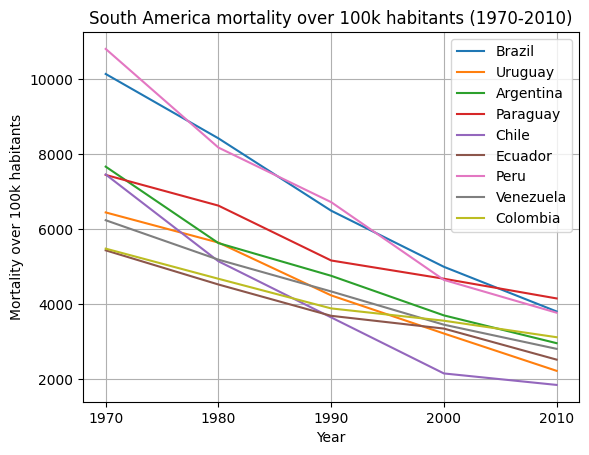

In [23]:
for country in south_america_countries:
    countries_row = df_south_america[df_south_america['Country Name']==country]
    countries_row = countries_row.groupby('Year')['Death Rate Per 100.000'].mean().reset_index()
    plt.plot(countries_row['Year'], countries_row['Death Rate Per 100.000'], linestyle='-', label=country)

plt.xlabel('Year')
plt.ylabel('Mortality over 100k habitants')
plt.title('South America mortality over 100k habitants (1970-2010)')
plt.legend()
plt.grid(True)
plt.xticks(range(1970, max(df_south_america['Year']) + 1, 10))

plt.show()

### 3. Are there significant differences in mortality rates between men and women in different age groups for South American countries?

In [194]:
df_south_america.groupby('Sex')['Death Rate Per 100.000'].mean().sort_values(ascending=False).astype(int).apply(lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.').replace(',','.'))

Sex
Male      5.729
Both      4.989
Female    4.273
Name: Death Rate Per 100.000, dtype: object

In [195]:
df_am_sul.groupby(['Age Group','Sex'])['Death Rate Per 100.000'].mean().round(0).astype(int).sort_values(ascending=False).apply(lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.').replace(',','.')).unstack()

Sex,Both,Female,Male
Age Group,,,
0-6 days,63.318,53.580,72.621
1-4 years,320,298,340
10-14 years,57,45,69
15-19 years,110,73,146
20-24 years,158,91,223
25-29 years,176,108,243
28-364 days,2.121,1.909,2.324
30-34 years,203,137,270
35-39 years,261,193,330


### 4. How does the mortality rate per 100,000 individuals vary among different age groups within Brazil? Use a histogram showing the distribution of deaths per year for each age group.

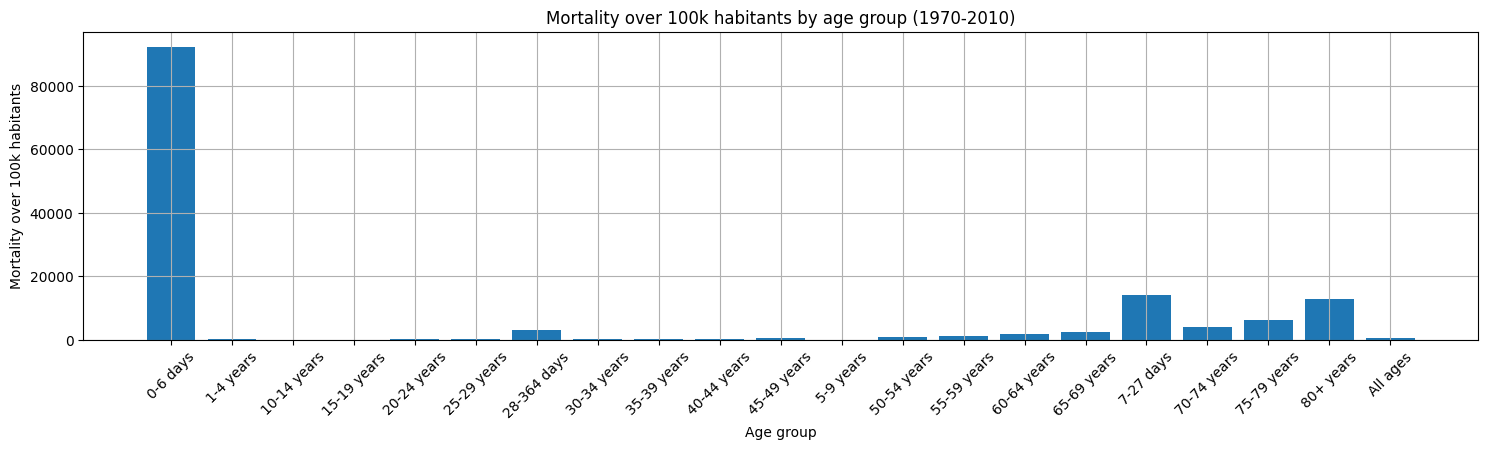

In [207]:
df_br = df_south_america[df_south_america['Country Name']=='Brazil']
country_rows = df_br.groupby('Age Group')['Death Rate Per 100.000'].mean().reset_index()

plt.figure(figsize=(18, 4))
plt.bar(country_rows['Age Group'], country_rows['Death Rate Per 100.000'])
plt.xlabel('Age group')
plt.ylabel('Mortality over 100k habitants')
plt.title('Mortality over 100k habitants by age group (1970-2010)')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

### 5. What is the trend in deaths by gender for Brazil? Plot a line graph with each line representing one of the genders over the years.

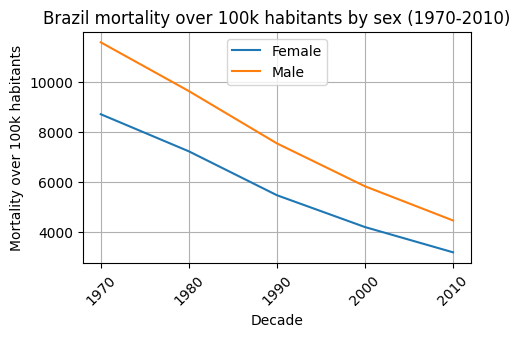

In [212]:
df_br = df_south_america[(df_south_america['Country Name']=='Brazil') & (df_south_america['Sex']!='Both')]
df_sex_grouped = df_br.groupby(['Year','Sex'])['Death Rate Per 100.000'].mean().reset_index()

plt.figure(figsize=(5,3))
for sex in df_sex_grouped['Sex'].drop_duplicates():
    sex_data = df_sex_grouped[df_sex_grouped['Sex'] == sex]
    plt.plot(sex_data['Year'].astype(str), sex_data['Death Rate Per 100.000'], label=sex)

plt.xlabel('Decade')
plt.ylabel('Mortality over 100k habitants')
plt.title('Brazil mortality over 100k habitants by sex (1970-2010)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper center')

plt.show()

### 6. Which age group has the highest number of deaths in Brazil? Is this number the same when looking at all years compared to considering only the last 10 years?

#### i. What's the age group with the highest death rate in Brazil?

In [224]:
df_br.groupby('Age Group')['Death Rate Per 100.000'].mean().sort_values(ascending=False).head(1).astype(int).apply(lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.').replace(',','.'))

Age Group
0-6 days    92.160
Name: Death Rate Per 100.000, dtype: object

#### ii. Which is the age group with the higghest deaths in Brazil in each decade?

In [230]:
df_br.groupby(['Year','Age Group'])['Death Rate Per 100.000'].mean().sort_values(ascending=False).groupby('Year').head(1).astype(int).apply(lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.').replace(',','.'))

Year  Age Group
1970  0-6 days     138.857
1980  0-6 days     118.136
1990  0-6 days      89.703
2000  0-6 days      67.190
2010  0-6 days      46.913
Name: Death Rate Per 100.000, dtype: object

#### Conclusion: The age group with the higgest mortality is with 1 life week in all the decades

### 7. Which country showed the most significant improvement in mortality rates per 100,000 individuals over the analyzed period?

#### >> Let's calculate the mortality hate by country in the first and last decades

In [225]:
df_70s=df[df['Year']==1970].groupby(['Country Name','Continent'])['Death Rate Per 100.000'].mean().sort_values(ascending=False).astype(int)
# change the column name 'Death Rate Per 100.000' to identify after the concatenate with the 10s column
df_70s.name = 'Death Rate Per 100.000 (dec 70)'

df_10s = df[df['Year']==2010].groupby(['Country Name','Continent'])['Death Rate Per 100.000'].mean().sort_values(ascending=False).astype(int)
# change the column name 'Death Rate Per 100.000' to identify after the concatenate with the 70s column
df_10s.name = 'Death Rate Per 100.000 (dec 10)'

In [227]:
df_concat = pd.concat([df_70s,df_10s],axis=1)
df_concat['Decrease of'] = 1 - (df_concat['Death Rate Per 100.000 (dec 10)']/df_concat['Death Rate Per 100.000 (dec 70)']).round(2)
df_concat = df_concat.sort_values(by=['Decrease of'],ascending=False)
df_concat['Ranking'] = [i for i in (range(1,df_concat.shape[0]+1))]
df_concat['Death Rate Per 100.000 (dec 70)'] = df_concat['Death Rate Per 100.000 (dec 70)'].apply(lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.').replace(',','.'))
df_concat['Death Rate Per 100.000 (dec 10)'] = df_concat['Death Rate Per 100.000 (dec 10)'].apply(lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.').replace(',','.'))
df_concat.head(10)

,,Death Rate Per 100.000 (dec 70),Death Rate Per 100.000 (dec 10),Decrease of,Ranking
Country Name,Continent,,,,
Maldives,Asia,18.331,3.030,0.83,1
Portugal,Europe,7.970,1.475,0.81,2
Oman,Asia,12.550,2.334,0.81,3
Bahrain,Asia,8.789,1.845,0.79,4
Slovenia,Europe,6.603,1.492,0.77,5
Qatar,Asia,7.744,1.817,0.77,6
Saudi Arabia,Asia,11.717,2.739,0.77,7
Singapore,Asia,5.633,1.319,0.77,8
Italy,Europe,6.463,1.521,0.76,9


#### >> How was the decrease of mortality by continent?

In [231]:
# first of all, let's filter the data from 70s in one dataframe, and from 10s in another dataframe:
df_70s_continents=df[df['Year']==1970].groupby('Continent')['Death Rate Per 100.000'].mean().sort_values(ascending=False).astype(int)
# change the column name 'Death Rate Per 100.000' to identify after the concatenate with the 10s column
df_70s_continents.name = 'Death Rate Per 100.000 (dec 70)'

df_10s_continents = df[df['Year']==2010].groupby('Continent')['Death Rate Per 100.000'].mean().sort_values(ascending=False).astype(int)
# change the column name 'Death Rate Per 100.000' to identify after the concatenate with the 70s column
df_10s_continents.name = 'Death Rate Per 100.000 (dec 10)'

In [234]:
# concatenate both dataframe that were just created
df_concat_continent = pd.concat([df_70s_continents, df_10s_continents],axis=1)
df_concat_continent['Decrease of'] = 1 - (df_concat_continent['Death Rate Per 100.000 (dec 10)']/df_concat_continent['Death Rate Per 100.000 (dec 70)']).round(2)

df_concat_continent = df_concat_continent.sort_values(by=['Decrease of'],ascending=False)

# add the ranking of countries with the higghest mortality rate
df_concat_continent['Ranking'] = [i for i in (range(1,df_concat_continent.shape[0]+1))]

# add a dot as million separator
df_concat_continent['Death Rate Per 100.000 (dec 70)'] = df_concat_continent['Death Rate Per 100.000 (dec 70)'].apply(lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.').replace(',','.'))
df_concat_continent['Death Rate Per 100.000 (dec 10)'] = df_concat_continent['Death Rate Per 100.000 (dec 10)'].apply(lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.').replace(',','.'))

df_concat_continent.head(10)

,Death Rate Per 100.000 (dec 70),Death Rate Per 100.000 (dec 10),Decrease of,Ranking
Continent,,,,
Europe,5.353,1.866,0.65,1
Asia,10.939,4.293,0.61,2
Americas,8.255,3.793,0.54,3
Africa,13.496,7.881,0.42,4
Oceania,7.901,4.602,0.42,5


### >> Which country had the higghest mortality rate decrease in each continent?

In [238]:
df_continent_concat = df_concat.reset_index()
df_continent_concat = df_continent_concat.loc[:,[
    'Continent','Country Name','Death Rate Per 100.000 (dec 70)', 'Death Rate Per 100.000 (dec 10)', 'Decrease of','Ranking']]
df_continent_concat = df_continent_concat.rename(columns={'Ranking':'General ranking'})

df_continent_concat.groupby('Continent').head(1)

,Continent,Country Name,Death Rate Per 100.000 (dec 70),Death Rate Per 100.000 (dec 10),Decrease of,General ranking
0,Asia,Maldives,18.331,3.030,0.83,1
1,Europe,Portugal,7.970,1.475,0.81,2
11,Americas,Chile,7.458,1.838,0.75,12
20,Africa,Tunisia,10.920,3.041,0.72,21
35,Oceania,Australia,4.754,1.469,0.69,36


__________________________________________________________________________________________________________________________________

### CONCLUSIONS
PART 1: About database estructure
- The set has 7 columns (5 categorical and 2 numerical) and 58.905 rows.
- There are 187 distinct countries, which appears 315 times, once they are grouped by age group (21 distinct values), sex (3 distinct values, which two summarize male and female data), decade (5 distinct values)
- There are 1.090 rows where Death Rate Per 100.000 habitants > 100.000, all of them with 1 week age group, which may indicate that death births are counted as deaths and not as births

PART 2: About database analyzis
- Africa is the continent with the higgest Death Rate Per 100.000 habitants average over 1970 and 2010, with Mali as the most representative country. The top 6 biggest death rates are africans
- Analyzing absolute numbers, India (94M) and China (78M) had the biggest deaths over the period, while Asia (282M) and Africa (70M) led by continents
- 61% of all deaths were men, and 62% of all deaths were 1-6 days age
- In South America, Brazil had the fourth higghest decrease of death rate between 1970 and 2010 with 63%. Still, South America had a proportion between sexes of 39% women x 61% men over all the period, against 44% women x 56% men worldwide's
- Death rate between 1970 and 2010: Europe had the highest decrease with 65%, Asia 61%, America 54%, Africa and Oceania with 42%. The countries with the highest decrease were Maldives in Asia with 83%, Portugal w/ 81%, Chile w/ 75%, Tunisia w/ 72% and Australia with 69%